In [ ]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# summarize loaded dataset
print('Train dataset shape=',X_train.shape)
print('Test dataset shape=',X_test.shape)

# Normalize the images.
X_train = (X_train / 255) #as the images of gray scale the values will be from 0-255
X_test = (X_test / 255) 

#converting to one hot encoded form
yoh_train=to_categorical(y_train)#to_categorical is also used for one hot encoding
yoh_test=to_categorical(y_test)

Train dataset shape= (60000, 28, 28)
Test dataset shape= (10000, 28, 28)


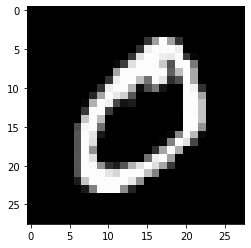

In [ ]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1352)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               135300    
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                     

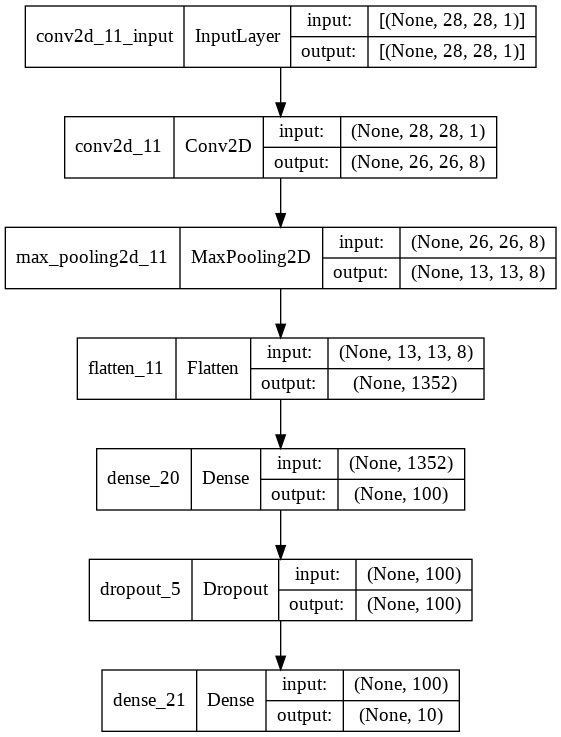

In [ ]:
#designing the architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)))#adding Convolutional layer
model.add(MaxPooling2D(pool_size=pool_size))# adding maxpool layer
model.add(Flatten()),#converting to 1D array for fatching to dense layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

print(model.summary())#summarize model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #visulaize the model

In [ ]:
#compliling the model
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
#traing the model
model.fit(
  X_train,
  yoh_train,
  epochs=5,
  validation_split=.25,#25% of the training dataset will be used for validation
)

Epoch 1/5
1407/1407 [==============================] - 19s 13ms/step - loss: 0.0306 - accuracy: 0.9892 - val_loss: 0.0827 - val_accuracy: 0.9802
Epoch 2/5
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0826 - val_accuracy: 0.9797
Epoch 3/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0839 - val_accuracy: 0.9809
Epoch 4/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0232 - accuracy: 0.9917 - val_loss: 0.0819 - val_accuracy: 0.9813
Epoch 5/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.0860 - val_accuracy: 0.9809


In [ ]:
#model testing
pred = model.predict(X_test)
pred=np.argmax(pred, axis=1)
print(y_test)
print(pred)
#print(np.argmax(predictions, axis=1))

[7 2 1 ... 4 5 6]
[5 2 5 ... 5 7 2]


In [ ]:
#printing the accuracy
from sklearn.metrics import accuracy_score 
acc=accuracy_score(y_test, pred)
print ("Accuracy : ",acc*100 )

Accuracy :  10.85
